In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


### There are no null values

<AxesSubplot:>

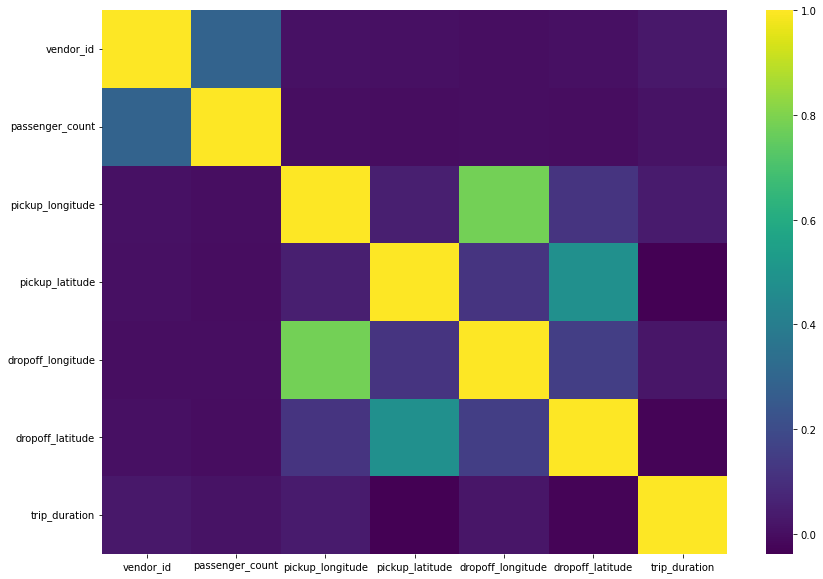

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap='viridis')

### Here we see dropoff and pickup longitude  are highly correlated because this is about single city and they lie on same longitude

In [6]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729322 non-null  object        
 1   vendor_id           729322 non-null  int64         
 2   pickup_datetime     729322 non-null  datetime64[ns]
 3   dropoff_datetime    729322 non-null  datetime64[ns]
 4   passenger_count     729322 non-null  int64         
 5   pickup_longitude    729322 non-null  float64       
 6   pickup_latitude     729322 non-null  float64       
 7   dropoff_longitude   729322 non-null  float64       
 8   dropoff_latitude    729322 non-null  float64       
 9   store_and_fwd_flag  729322 non-null  object        
 10  trip_duration       729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 61.2+ MB


## Lets check the datetime features to analyse the when the travel was carried out

In [7]:
print(f"The trips are taken in {df['pickup_datetime'].dt.year.value_counts()}")
print(f"The trips are taken in {df['dropoff_datetime'].dt.year.value_counts()}")

The trips are taken in 2016    729322
Name: pickup_datetime, dtype: int64
The trips are taken in 2016    729322
Name: dropoff_datetime, dtype: int64


#### As we see the trips are carried down in 2016 so we dont need the year as a feature

## Vendor Id

The trips are taken by vendor of following codes 
2    390481
1    338841
Name: vendor_id, dtype: int64


<AxesSubplot:>

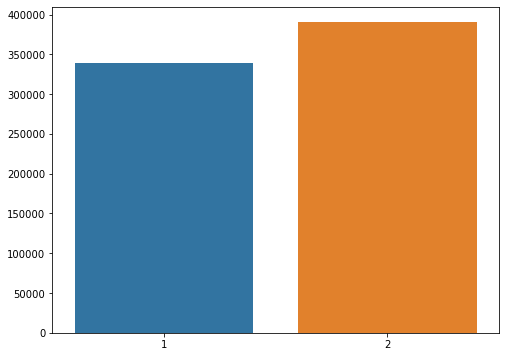

In [8]:
print(f"The trips are taken by vendor of following codes \n{df['vendor_id'].value_counts()}")
plt.figure(figsize=(8,6))
sns.barplot(x=df['vendor_id'].value_counts().index,data=df,y=df['vendor_id'].value_counts().values)

## Months in the Year

The trips are taken in months starting from January till June 
3    128316
4    125634
5    124201
2    119364
6    117406
1    114401
Name: pickup_datetime, dtype: int64


<AxesSubplot:>

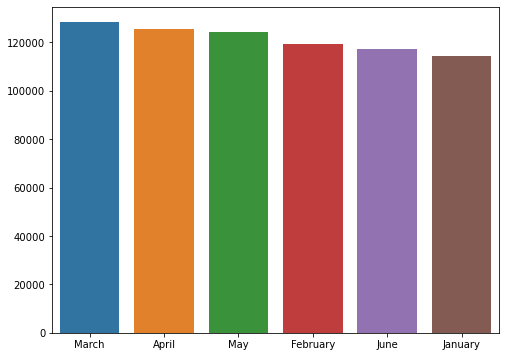

In [9]:
print(f"The trips are taken in months starting from January till June \n{df['pickup_datetime'].dt.month.value_counts()}")
plt.figure(figsize=(8,6))
sns.barplot(x=df['pickup_datetime'].dt.strftime('%B').value_counts().index,data=df,y=df['pickup_datetime'].dt.strftime('%B').value_counts().values)

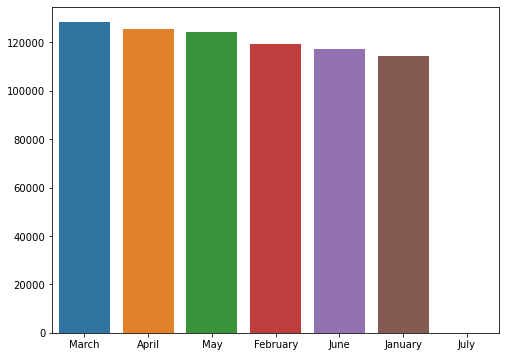

The trips are taken in the months starting from January till July
3    128284
4    125633
5    124236
2    119361
6    117380
1    114375
7        53
Name: dropoff_datetime, dtype: int64


In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['dropoff_datetime'].dt.strftime('%B').value_counts().index,data=df,y=df['dropoff_datetime'].dt.strftime('%B').value_counts().values)
plt.show()
print(f"The trips are taken in the months starting from January till July\n{df['dropoff_datetime'].dt.month.value_counts()}")

#### We can see that trips have been carried in the first half of the year from January to June and this feature will help in the extraction

## Day of the Week

The trips are taken in 
0     93972
1    101254
2    105074
3    109344
4    111744
5    110252
6     97682
Name: pickup_datetime, dtype: int64


<AxesSubplot:>

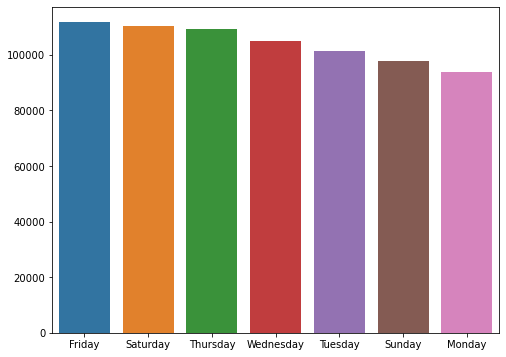

In [11]:
print(f"The trips are taken in \n{df['pickup_datetime'].dt.weekday.value_counts().sort_index()}")
plt.figure(figsize=(8,6))
sns.barplot(x=df['pickup_datetime'].dt.strftime('%A').value_counts().index,data=df,y=df['pickup_datetime'].dt.strftime('%A').value_counts().values)

The trips are taken in 
0     93959
1    101142
2    104944
3    108918
4    111509
5    110289
6     98561
Name: dropoff_datetime, dtype: int64


<AxesSubplot:>

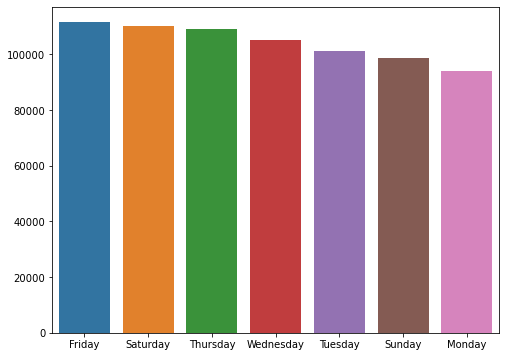

In [12]:
print(f"The trips are taken in \n{df['dropoff_datetime'].dt.weekday.value_counts().sort_index()}")
plt.figure(figsize=(8,6))
sns.barplot(x=df['dropoff_datetime'].dt.strftime('%A').value_counts().index,data=df,y=df['dropoff_datetime'].dt.strftime('%A').value_counts().values)

#### As we can see the rides are taken mostly on Friday and Saturday compared to other days but distribution is pretty much what we expect

### Days of the month

The trips are taken in 


<AxesSubplot:>

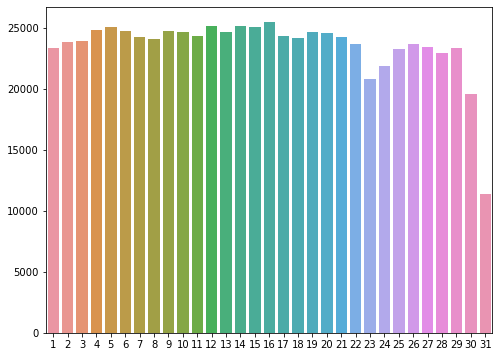

In [13]:
print(f"The trips are taken in ")
plt.figure(figsize=(8,6))
sns.barplot(x=df['dropoff_datetime'].dt.day.value_counts().index,data=df,y=df['dropoff_datetime'].dt.day.value_counts().values)

The trips are taken in 



<AxesSubplot:>

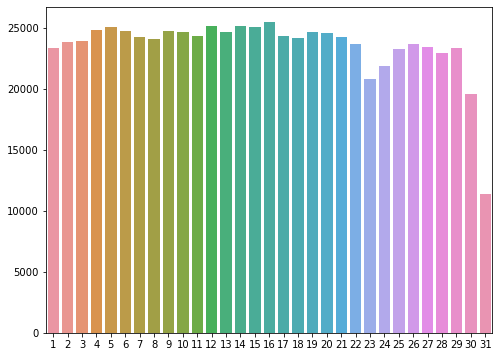

In [14]:
print(f"The trips are taken in \n")
plt.figure(figsize=(8,6))
sns.barplot(x=df['dropoff_datetime'].dt.day.value_counts().index,data=df,y=df['dropoff_datetime'].dt.day.value_counts().values)

## Lets look into passenger count

<AxesSubplot:>

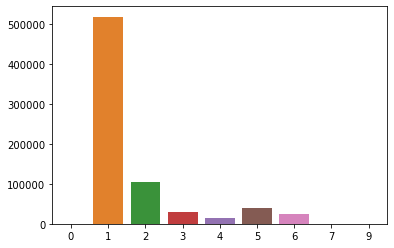

In [15]:
sns.barplot(data=df,x=df['passenger_count'].value_counts().sort_index().index.values,y=df['passenger_count'].value_counts().sort_index().values)

### We can see majority of the passenger count is 1 and followed by 2 passengers

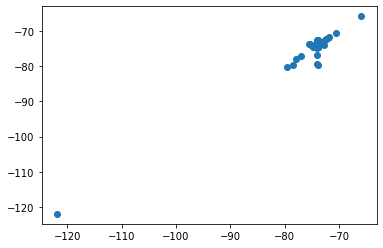

In [16]:
plt.scatter(x=df['pickup_longitude'],y=df['dropoff_longitude'])

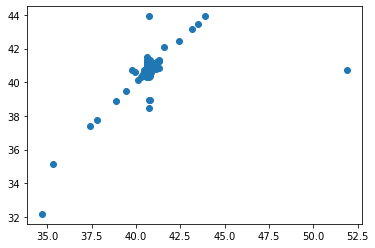

In [17]:
plt.scatter(x=df['pickup_latitude'],y=df['dropoff_latitude'])

## Lets check the flag counts

In [18]:
df['store_and_fwd_flag'].value_counts().to_dict()

{'N': 725282, 'Y': 4040}

<AxesSubplot:>

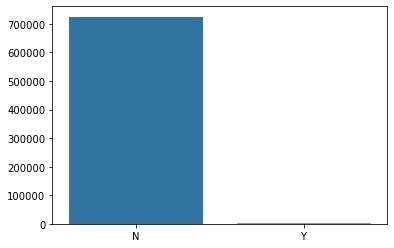

In [19]:
sns.barplot(data=df,x=df['store_and_fwd_flag'].value_counts().index.values,y=df['store_and_fwd_flag'].value_counts().values)

### We can see that majority of the trips had proper connections to netwrok and trip was recorded

## Lets check the trip duration

<AxesSubplot:xlabel='trip_duration', ylabel='count'>

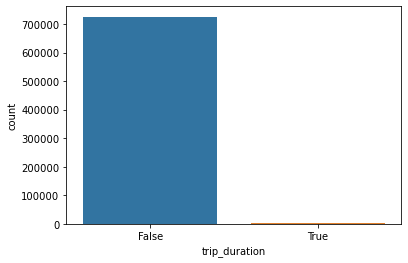

In [20]:
sns.countplot(df['trip_duration']<60)

### We can see that few of the trips have ride less than a minute which could signify that trip dint start as taxi cant travel anywhere within a minute

In [21]:
df[df['trip_duration']<60]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
136,id1514658,1,2016-03-22 08:23:09,2016-03-22 08:23:16,2,-73.902054,40.764011,-73.902061,40.764023,N,7
415,id0446273,2,2016-04-04 12:56:16,2016-04-04 12:56:26,5,-73.863091,40.769840,-73.863312,40.769630,N,10
448,id1326538,2,2016-03-18 12:19:33,2016-03-18 12:19:42,1,-73.974197,40.762718,-73.975693,40.760723,N,9
785,id1764292,1,2016-03-15 15:13:22,2016-03-15 15:14:16,1,-73.985260,40.763458,-73.982109,40.767265,N,54
1493,id1359484,1,2016-04-28 09:59:34,2016-04-28 10:00:32,1,-73.996864,40.737514,-73.998665,40.738136,N,58
...,...,...,...,...,...,...,...,...,...,...,...
728793,id0802812,1,2016-05-12 05:52:36,2016-05-12 05:52:42,1,-73.985931,40.767986,-73.985931,40.767982,N,6
729011,id2277062,2,2016-02-17 05:26:18,2016-02-17 05:26:30,2,-73.978523,40.765221,-73.979462,40.765781,N,12
729022,id3715420,1,2016-05-29 12:04:06,2016-05-29 12:04:33,1,-73.945587,40.751602,-73.945602,40.751568,N,27
729073,id1124394,2,2016-03-12 22:38:09,2016-03-12 22:38:58,2,-73.962418,40.758919,-73.960655,40.761398,N,49


## Lets look at the individual time feature of all rides like days minutes hours  

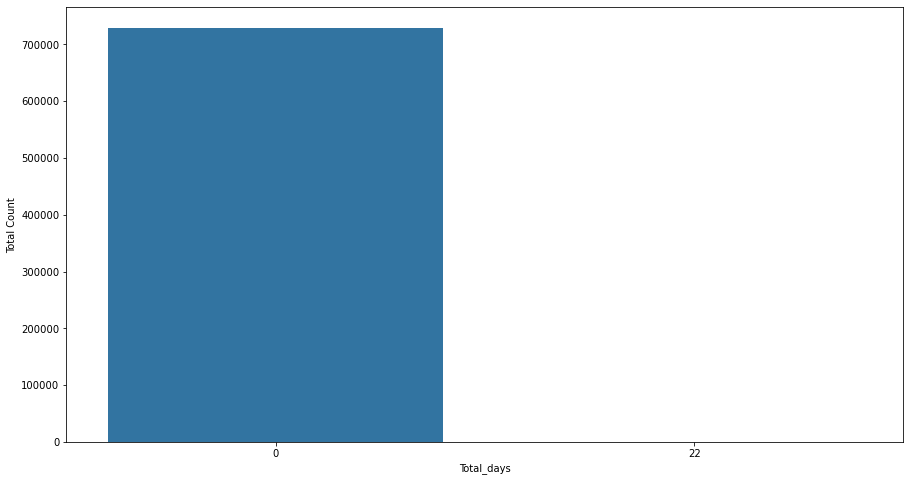

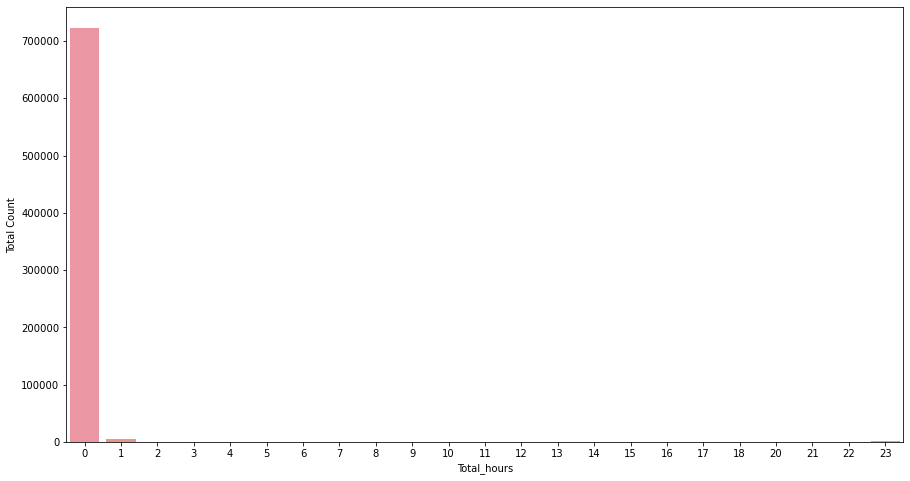

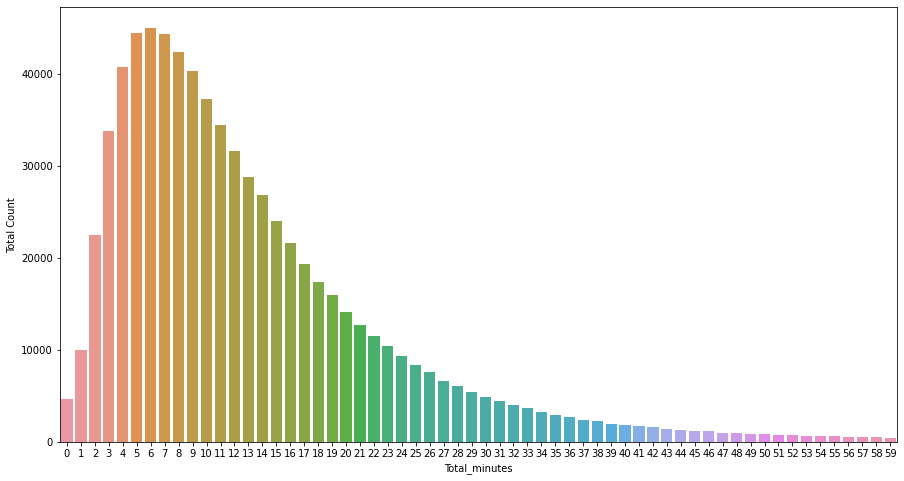

In [22]:
temp=df['dropoff_datetime']-df['pickup_datetime']
timings=temp.dt.components.iloc[:,:3].add_prefix('Total_')
timings
for column in timings.columns:
    plt.figure(figsize=(15,8))
    sns.barplot(data=timings,x=timings[column].value_counts().index.values,y=timings[column].value_counts().values)
    plt.xlabel(column)
    plt.ylabel('Total Count')
    plt.show()

### As we can observe from the following
* There is a certain ride which has taken 22 days which seems to be out of order which we will look into later
* Total hours seem to be fair as majority of them have taken rides for less than an hour
* Total Minutes seem to right skewed data as majority are taking rides for less time period

In [23]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


In [24]:
df=pd.concat([df,timings],axis=1,join='outer')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Total_days,Total_hours,Total_minutes
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,0,6
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,0,18
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,0,27
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,0,19
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,0,0,4
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,0,0,5
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,0,0,11
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,0,0,7


In [25]:
# df['pickup_month']=df['pickup_datetime'].dt.strftime('%B')
# df['dropoff_month']=df['dropoff_datetime'].dt.strftime('%B')
# df['pickup_dayofweek']=df['pickup_datetime'].dt.strftime('%A')
# df['dropoff_dayofweek']=df['dropoff_datetime'].dt.strftime('%A')
df['month']=df['pickup_datetime'].dt.month
df['dayofweek']=df['pickup_datetime'].dt.dayofweek
df['pickup_time']=df['pickup_datetime'].dt.hour+(df['pickup_datetime'].dt.minute)/60
df['dropoff_time']=df['dropoff_datetime'].dt.hour+(df['dropoff_datetime'].dt.minute)/60
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Total_days,Total_hours,Total_minutes,month,dayofweek,pickup_time,dropoff_time
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,0,6,2,0,16.666667,16.783333
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,0,18,3,4,23.583333,23.883333
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,0,27,2,6,17.983333,18.433333
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,0,19,1,1,9.733333,10.050000
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,0,14,2,2,6.700000,6.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,0,0,4,5,5,13.483333,13.566667
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,0,0,5,2,0,0.716667,0.800000
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,0,0,11,4,4,18.933333,19.133333
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,0,0,7,6,6,9.833333,9.966667


# Feature Engineering

### Lets drop the rows which have less than 1 minute ride and more than 1 day ride as it doesnt represent general usage of taxi

In [26]:
df['Total_days'].value_counts()

0     729321
22         1
Name: Total_days, dtype: int64

In [27]:
df.drop(df[df['Total_days']>1].index,axis=0,inplace=True)

In [28]:
df.drop(df[df['trip_duration']<60].index,axis=0,inplace=True)

In [29]:
df['Total_days'].value_counts()

0    725050
Name: Total_days, dtype: int64

### Lets drop the total days as there are only 0 in it

In [30]:
df.drop('Total_days',axis=1,inplace=True)

In [31]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Total_hours,Total_minutes,month,dayofweek,pickup_time,dropoff_time
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,6,2,0,16.666667,16.783333
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,18,3,4,23.583333,23.883333
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,27,2,6,17.983333,18.433333
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,19,1,1,9.733333,10.050000
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,14,2,2,6.700000,6.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,0,4,5,5,13.483333,13.566667
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,0,5,2,0,0.716667,0.800000
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,0,11,4,4,18.933333,19.133333
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,0,7,6,6,9.833333,9.966667


In [32]:
for column1 in df.drop('trip_duration',axis=1).corr().columns:
    for column2 in df.drop('trip_duration',axis=1).corr().columns:
        if column1!=column2:
            if abs(round(df[[column1,column2]].corr().iloc[0][1],2))>=0.5:
                print(f'The correlation between {column1} and {column2} is {df[[column1,column2]].corr().iloc[0][1]}')

The correlation between pickup_longitude and dropoff_longitude is 0.778512898664406
The correlation between dropoff_longitude and pickup_longitude is 0.7785128986644071
The correlation between pickup_time and dropoff_time is 0.9322733461072951
The correlation between dropoff_time and pickup_time is 0.9322733461072951


### As we can see out of total 4 columns which are highly correlated we can drop 3 of them as the rest 2 can represent the other features

In [33]:
df.drop(columns=['pickup_longitude','pickup_time'],axis=1,inplace=True)

### Lets drop id pickuptime dropofftime as we have extracted features from and id doesnt help anything

In [34]:
df.drop(columns=['id','pickup_datetime','dropoff_datetime'],axis=1,inplace=True)

In [35]:
df

,vendor_id,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Total_hours,Total_minutes,month,dayofweek,dropoff_time
0,2,1,40.778873,-73.963875,40.771164,N,400,0,6,2,0,16.783333
1,1,2,40.731743,-73.994751,40.694931,N,1100,0,18,3,4,23.883333
2,2,2,40.721458,-73.948029,40.774918,N,1635,0,27,2,6,18.433333
3,2,6,40.759720,-73.956779,40.780628,N,1141,0,19,1,1,10.050000
4,1,1,40.708469,-73.988182,40.740631,N,848,0,14,2,2,6.933333
...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,40.789780,-73.952637,40.789181,N,296,0,4,5,5,13.566667
729318,1,1,40.737434,-74.001320,40.731911,N,315,0,5,2,0,0.800000
729319,1,1,40.761696,-74.001488,40.741207,N,673,0,11,4,4,19.133333
729320,1,1,40.708244,-74.013550,40.713814,N,447,0,7,6,6,9.966667


In [36]:
print(f'The value counts for store and forward flag is {df["store_and_fwd_flag"].value_counts()["Y"]/len(df)*100} %')
# df.drop(df[df['store_and_fwd_flag']])

The value counts for store and forward flag is 0.5469967588442176 %


### Lets check the hours data of dataframe

In [37]:
df['Total_hours'].value_counts()[0]/len(df)

0.991633680435832

In [38]:
df

,vendor_id,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Total_hours,Total_minutes,month,dayofweek,dropoff_time
0,2,1,40.778873,-73.963875,40.771164,N,400,0,6,2,0,16.783333
1,1,2,40.731743,-73.994751,40.694931,N,1100,0,18,3,4,23.883333
2,2,2,40.721458,-73.948029,40.774918,N,1635,0,27,2,6,18.433333
3,2,6,40.759720,-73.956779,40.780628,N,1141,0,19,1,1,10.050000
4,1,1,40.708469,-73.988182,40.740631,N,848,0,14,2,2,6.933333
...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,40.789780,-73.952637,40.789181,N,296,0,4,5,5,13.566667
729318,1,1,40.737434,-74.001320,40.731911,N,315,0,5,2,0,0.800000
729319,1,1,40.761696,-74.001488,40.741207,N,673,0,11,4,4,19.133333
729320,1,1,40.708244,-74.013550,40.713814,N,447,0,7,6,6,9.966667


<AxesSubplot:>

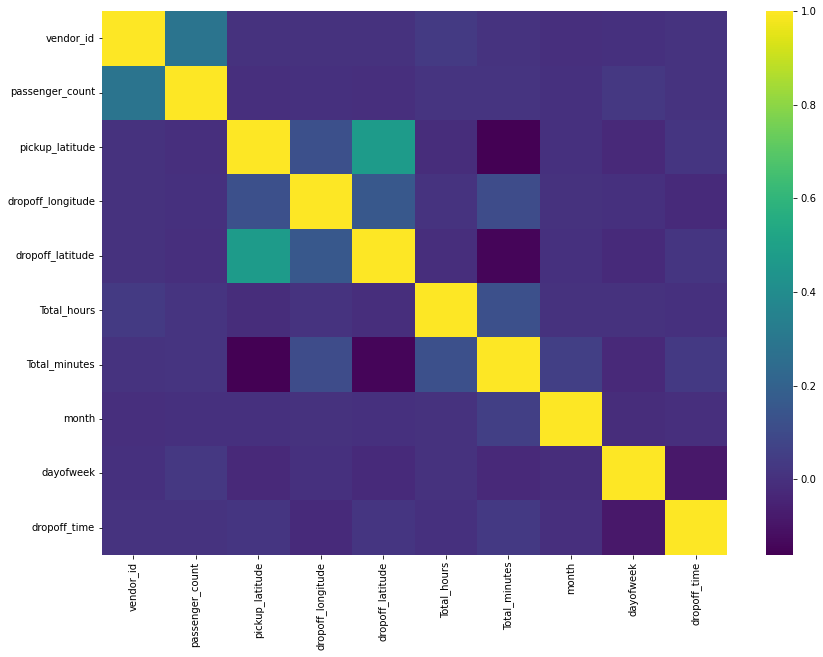

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(df.drop('trip_duration',axis=1).corr(),cmap='viridis')

### Lets see columns that are categorical

In [40]:
categorical_columns=[]
for column in df.columns:
    if df[column].nunique()<5:
        print(column)
        categorical_columns.append(column)

vendor_id
store_and_fwd_flag


### Lets do the one hot encoding for the categorical variables

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,drop='first')
for column in categorical_columns:
    onehotencoded=ohe.fit_transform(df[[column]])
    ohe_columns=ohe.get_feature_names_out()
    df[ohe_columns]=onehotencoded
    df.drop(column,axis=1,inplace=True)

### Lets do median encoding for columns having more than 5 and less than 10 unique items

In [42]:
label_columns=[]
for column in df.columns:
    if 10>df[column].nunique()>5:
        print(f'the {column} has {df[column].nunique()} elements')
        label_columns.append(column)
# label_columns

the passenger_count has 8 elements
the month has 6 elements
the dayofweek has 7 elements


In [43]:
for column in label_columns:
    map_dict=df.groupby(column)['trip_duration'].median().to_dict()
    df[column]=df[column].map(map_dict)

In [44]:
map_dict=df.groupby('Total_hours')['trip_duration'].median().to_dict()
df['Total_hours']=df['Total_hours'].map(map_dict)

In [45]:
df_copy=df.copy()
df_copy

,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Total_hours,Total_minutes,month,dayofweek,dropoff_time,vendor_id_2,store_and_fwd_flag_Y
0,659.0,40.778873,-73.963875,40.771164,400,661.0,6,639.0,634.0,16.783333,1.0,0.0
1,692.0,40.731743,-73.994751,40.694931,1100,661.0,18,657.0,694.0,23.883333,0.0,0.0
2,692.0,40.721458,-73.948029,40.774918,1635,661.0,27,639.0,606.0,18.433333,1.0,0.0
3,663.0,40.759720,-73.956779,40.780628,1141,661.0,19,633.0,682.0,10.050000,1.0,0.0
4,659.0,40.708469,-73.988182,40.740631,848,661.0,14,639.0,701.0,6.933333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
729317,692.0,40.789780,-73.952637,40.789181,296,661.0,4,693.0,639.0,13.566667,1.0,0.0
729318,659.0,40.737434,-74.001320,40.731911,315,661.0,5,639.0,634.0,0.800000,0.0,0.0
729319,659.0,40.761696,-74.001488,40.741207,673,661.0,11,679.0,694.0,19.133333,0.0,0.0
729320,659.0,40.708244,-74.013550,40.713814,447,661.0,7,702.0,606.0,9.966667,0.0,0.0


## Lets scale down the data

In [46]:
X=df.drop('trip_duration',axis=1)
y=df['trip_duration']

In [47]:
X.columns

Index(['passenger_count', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'Total_hours', 'Total_minutes', 'month',
       'dayofweek', 'dropoff_time', 'vendor_id_2', 'store_and_fwd_flag_Y'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy import stats
import numpy as np
Robust=RobustScaler()
Standard=StandardScaler()
Minmax=MinMaxScaler()
def plot_transform(df,column):
    fig,axes=plt.subplots(2,5,figsize=(20,10))
    plt.suptitle(f'plot for {column}')
    sns.axisgrid
    sns.distplot(ax=axes[0,0],a=df[column],axlabel='normal')
    sns.distplot(ax=axes[0,1],a=1/(0.01+df[column]),axlabel='reciprocal')
    sns.distplot(ax=axes[0,2],a=np.sqrt(df[column]),axlabel='squareroot')
    sns.distplot(ax=axes[0,3],a=(df[column]**(1/3)),axlabel='cuberoot')
    sns.distplot(ax=axes[0,4],a=np.log1p(df[column]),axlabel='logarithmic')
    sns.distplot(ax=axes[1,0],a=Minmax.fit_transform(df[[column]]),axlabel='Minmax')
    sns.distplot(ax=axes[1,1],a=Standard.fit_transform(df[[column]]),axlabel='Standard Scaler')
    sns.distplot(ax=axes[1,2],a=Robust.fit_transform(df[[column]]),axlabel='Robustscaler')
    # if (df[column]>0).value_counts().index==True:
    #     sns.distplot(ax=axes[1,3],a=stats.boxcox(df[column])[0],axlabel='Boxcox')
    # else:
    #     sns.distplot(ax=axes[1,3],a=stats.boxcox(-df[column])[0],axlabel='Boxcox')

In [49]:
# for column in X.columns:
#     plot_transform(df,column)

In [50]:
X['Total_minutes']=np.sqrt(X['Total_minutes'])

In [51]:
X

,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,Total_hours,Total_minutes,month,dayofweek,dropoff_time,vendor_id_2,store_and_fwd_flag_Y
0,659.0,40.778873,-73.963875,40.771164,661.0,2.449490,639.0,634.0,16.783333,1.0,0.0
1,692.0,40.731743,-73.994751,40.694931,661.0,4.242641,657.0,694.0,23.883333,0.0,0.0
2,692.0,40.721458,-73.948029,40.774918,661.0,5.196152,639.0,606.0,18.433333,1.0,0.0
3,663.0,40.759720,-73.956779,40.780628,661.0,4.358899,633.0,682.0,10.050000,1.0,0.0
4,659.0,40.708469,-73.988182,40.740631,661.0,3.741657,639.0,701.0,6.933333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
729317,692.0,40.789780,-73.952637,40.789181,661.0,2.000000,693.0,639.0,13.566667,1.0,0.0
729318,659.0,40.737434,-74.001320,40.731911,661.0,2.236068,639.0,634.0,0.800000,0.0,0.0
729319,659.0,40.761696,-74.001488,40.741207,661.0,3.316625,679.0,694.0,19.133333,0.0,0.0
729320,659.0,40.708244,-74.013550,40.713814,661.0,2.645751,702.0,606.0,9.966667,0.0,0.0


In [52]:
for columns in X.drop('Total_minutes',axis=1).columns:
    X[columns]=Standard.fit_transform(X[[columns]])

In [53]:
X

,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,Total_hours,Total_minutes,month,dayofweek,dropoff_time,vendor_id_2,store_and_fwd_flag_Y
0,-0.561828,0.835170,0.139264,0.538958,-0.04481,2.449490,-1.103872,-0.924710,0.412515,0.930254,-0.074162
1,1.885642,-0.574891,-0.305294,-1.584968,-0.04481,4.242641,-0.405432,0.689510,1.506403,-1.074975,-0.074162
2,1.885642,-0.882582,0.367420,0.643539,-0.04481,5.196152,-1.103872,-1.678013,0.666729,0.930254,-0.074162
3,-0.265165,0.262129,0.241423,0.802642,-0.04481,4.358899,-1.336685,0.366666,-0.624881,0.930254,-0.074162
4,-0.561828,-1.271191,-0.210715,-0.311718,-0.04481,3.741657,-1.103872,0.877835,-1.105061,-1.074975,-0.074162
...,...,...,...,...,...,...,...,...,...,...,...
729317,1.885642,1.161464,0.301071,1.040925,-0.04481,2.000000,0.991449,-0.790192,-0.083072,0.930254,-0.074162
729318,-0.561828,-0.404611,-0.399874,-0.554677,-0.04481,2.236068,-1.103872,-0.924710,-2.050016,-1.074975,-0.074162
729319,-0.561828,0.321248,-0.402291,-0.295669,-0.04481,3.316625,0.448218,0.689510,0.774577,-1.074975,-0.074162
729320,-0.561828,-1.277924,-0.575962,-1.058876,-0.04481,2.645751,1.340669,-1.678013,-0.637720,-1.074975,-0.074162


## Lets build the model

In [54]:
X=X.drop('Total_hours',axis=1)

In [55]:
X

,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,Total_minutes,month,dayofweek,dropoff_time,vendor_id_2,store_and_fwd_flag_Y
0,-0.561828,0.835170,0.139264,0.538958,2.449490,-1.103872,-0.924710,0.412515,0.930254,-0.074162
1,1.885642,-0.574891,-0.305294,-1.584968,4.242641,-0.405432,0.689510,1.506403,-1.074975,-0.074162
2,1.885642,-0.882582,0.367420,0.643539,5.196152,-1.103872,-1.678013,0.666729,0.930254,-0.074162
3,-0.265165,0.262129,0.241423,0.802642,4.358899,-1.336685,0.366666,-0.624881,0.930254,-0.074162
4,-0.561828,-1.271191,-0.210715,-0.311718,3.741657,-1.103872,0.877835,-1.105061,-1.074975,-0.074162
...,...,...,...,...,...,...,...,...,...,...
729317,1.885642,1.161464,0.301071,1.040925,2.000000,0.991449,-0.790192,-0.083072,0.930254,-0.074162
729318,-0.561828,-0.404611,-0.399874,-0.554677,2.236068,-1.103872,-0.924710,-2.050016,-1.074975,-0.074162
729319,-0.561828,0.321248,-0.402291,-0.295669,3.316625,0.448218,0.689510,0.774577,-1.074975,-0.074162
729320,-0.561828,-1.277924,-0.575962,-1.058876,2.645751,1.340669,-1.678013,-0.637720,-1.074975,-0.074162


In [121]:
X1=X.drop(['store_and_fwd_flag_Y','Total_minutes'],axis=1)
X1

,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,month,dayofweek,dropoff_time,vendor_id_2
0,-0.561828,0.835170,0.139264,0.538958,-1.103872,-0.924710,0.412515,0.930254
1,1.885642,-0.574891,-0.305294,-1.584968,-0.405432,0.689510,1.506403,-1.074975
2,1.885642,-0.882582,0.367420,0.643539,-1.103872,-1.678013,0.666729,0.930254
3,-0.265165,0.262129,0.241423,0.802642,-1.336685,0.366666,-0.624881,0.930254
4,-0.561828,-1.271191,-0.210715,-0.311718,-1.103872,0.877835,-1.105061,-1.074975
...,...,...,...,...,...,...,...,...
729317,1.885642,1.161464,0.301071,1.040925,0.991449,-0.790192,-0.083072,0.930254
729318,-0.561828,-0.404611,-0.399874,-0.554677,-1.103872,-0.924710,-2.050016,-1.074975
729319,-0.561828,0.321248,-0.402291,-0.295669,0.448218,0.689510,0.774577,-1.074975
729320,-0.561828,-1.277924,-0.575962,-1.058876,1.340669,-1.678013,-0.637720,-1.074975


In [56]:
def plot_transform1(y):
    fig,axes=plt.subplots(2,5,figsize=(20,10))
    plt.suptitle(f'plot for {column}')
    sns.axisgrid
    sns.distplot(ax=axes[0,0],a=y,axlabel='normal')
    sns.distplot(ax=axes[0,1],a=1/(0.01+y),axlabel='reciprocal')
    sns.distplot(ax=axes[0,2],a=np.sqrt(y),axlabel='squareroot')
    sns.distplot(ax=axes[0,3],a=(y**(1/3)),axlabel='cuberoot')
    sns.distplot(ax=axes[0,4],a=np.log1p(y),axlabel='logarithmic')
    sns.distplot(ax=axes[1,0],a=Minmax.fit_transform([y]),axlabel='Minmax')
    sns.distplot(ax=axes[1,1],a=Standard.fit_transform([y]),axlabel='Standard Scaler')
    sns.distplot(ax=axes[1,2],a=Robust.fit_transform([y]),axlabel='Robustscaler')
    # if (df[column]>0).value_counts().index==True:
    #     sns.distplot(ax=axes[1,3],a=stats.boxcox(df[column])[0],axlabel='Boxcox')
    # else:
    #     sns.distplot(ax=axes[1,3],a=stats.boxcox(-df[column])[0],axlabel='Boxcox')

In [57]:
# plot_transform1(y)

In [58]:
y=np.log(y)
y

0         5.991465
1         7.003065
2         7.399398
3         7.039660
4         6.742881
            ...   
729317    5.690359
729318    5.752573
729319    6.511745
729320    6.102559
729321    7.109879
Name: trip_duration, Length: 725050, dtype: float64

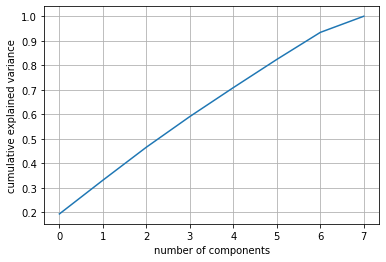

In [122]:
from sklearn.decomposition import PCA
pca=PCA().fit(X1)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [123]:
pca=PCA(n_components=7,random_state=42)
pca.fit(X1)
X_pca=pca.transform(X1)

In [108]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7'],
      dtype=object)

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import SelectKBest,f_regression
Linear=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,random_state=42,test_size=0.25)

In [125]:
linear_model=Linear.fit(X_train,y_train)
linear_pred=linear_model.predict(X_test)
linear_pred

array([6.48711593, 6.54247989, 6.53232592, ..., 6.23040154, 6.39875982,
       6.50250505])

In [126]:
np.sqrt(mean_squared_error(y_test,linear_pred))

0.7279290823293592

In [127]:
print(f'The train accuracy is {r2_score(y_train,linear_model.predict(X_train))}')
print(f'The test accuracy is {r2_score(y_test,linear_pred)}')

The train accuracy is 0.05407025636801721
The test accuracy is 0.05760851579481174


In [128]:
predictions=pd.DataFrame()
predictions['y_true']=y_test
predictions['y_pred']=linear_pred
predictions

,y_true,y_pred
421452,5.814131,6.487116
494944,7.032624,6.542480
303687,6.731018,6.532326
321044,6.779922,6.393892
520907,6.668228,6.414376
...,...,...
207860,5.971262,6.348043
636874,7.177782,6.412771
296872,4.919981,6.230402
505075,6.194405,6.398760


### Now as we can see we are getting good accuracy but we need to do inverse transform as this is not true prediction

In [129]:
predictions['y_true']=np.exp(predictions['y_true'])
predictions['y_pred']=round(np.exp(predictions['y_pred']))
predictions['error']=predictions['y_true']-predictions['y_pred']
predictions

,y_true,y_pred,error
421452,335.0,657.0,-322.0
494944,1133.0,694.0,439.0
303687,838.0,687.0,151.0
321044,880.0,598.0,282.0
520907,787.0,611.0,176.0
...,...,...,...
207860,392.0,571.0,-179.0
636874,1310.0,610.0,700.0
296872,137.0,508.0,-371.0
505075,490.0,601.0,-111.0


In [130]:
from sklearn.tree import DecisionTreeRegressor
import xgboost
decision=DecisionTreeRegressor()
boost=xgboost.XGBRegressor()

In [131]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
}

In [132]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
decision_tree=RandomizedSearchCV(boost,param_distributions=params,scoring='r2',n_jobs=-1,verbose=1,cv=2,n_iter=10)
decision_tree.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=1)

In [71]:
boost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [72]:
boost_pred=boost.predict(X_test)
boost_pred

array([6.1315994, 6.1933904, 6.441891 , ..., 5.97765  , 6.5352   ,
       6.2780356], dtype=float32)

In [73]:
r2_score(y_test,boost_pred)

0.22290458463872653

In [74]:
r2_score(y_train,boost.predict(X_train))

0.2483917405136037

In [133]:
decision_tree.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [135]:
print(decision_tree.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [136]:
xgb=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
             missing=np.nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [137]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [138]:
dummy=xgb.predict(X_test)
dummy

array([6.2808223, 6.3523135, 6.756567 , ..., 6.328137 , 6.4478226,
       6.209427 ], dtype=float32)

In [139]:
r2_score(y_test,dummy)

0.23635730131587152

In [140]:
r2_score(y_train,xgb.predict(X_train))

0.29696220369295323